# <center>Humor as a Mirror: The New Yorker Captions as Reflections of Society, Politics, and Stereotypes</center>

<br/><br/>
<center>
    <img src="data/newyorker_caption_contest_virgin/images/666.jpg" alt="New Yorker Cartoon" style="width:300px; height:auto; border-radius:5px; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
</center>

---

# <center>Milestone 3 : Table of content</center>

0. **Imports, initialisations**

1. **Recall of certain methods from Milestone 2**
   - 1.1. Data preprocessing
   - 1.2. Construction of a new funny metric
   - 1.3. Gathering of other datasets
   - 1.4. Tokenisation and lemmatisation of data
   - 1.5. Descriptive statistic tasks
   - 1.6. Building usefull metrics


2. **Narrative Flow**
   - 4.1. **Axis 1 – What Is Considered Funny**
   - 4.2. **Axis 2 – Professions, Politics, and Power**
   - 4.3. **Axis 3 – Gender Roles**

## 0. Imports, initialisations

In case an import cannot be imported run this:

In [1]:
import importlib
import src.utils.paths as p
importlib.reload(p)

<module 'src.utils.paths' from 'c:\\Users\\cyrie\\OneDrive\\Documents\\EPFL\\2025_MA_1\\ADA\\ada-2025-project-adacore42\\src\\utils\\paths.py'>

Getting the project root directory path.

In [2]:
from pathlib import Path
import sys
import os

try:
    root = Path(__file__).resolve().parent
except NameError:
    root = Path.cwd()  # fallback for Jupyter notebooks

while root.parent != root:
    if any((root / marker).exists() for marker in [".git", "README.md", "results.ipynb"]):
        break
    root = root.parent

# Fallback in case nothing found
if not any((root / marker).exists() for marker in [".git", "README.md", "results.ipynb"]):
    print("Could not locate project root — defaulting to current working directory")
    root = Path.cwd()

print(f"Root folder detected at: {root}")

# Ensure importability of the project
if str(root) not in sys.path:
    sys.path.insert(0, str(root))


from src.utils.paths import STORED_DATAPREP_PKL_PATH, STORED_PLOTSGUI_PKL_PATH, DATA_PREPARATION_PY_PATH, STORED_DATAPREPNOUNS_PKL_PATH, STORED_DATAPREPTOKENS_PKL_PATH, OCCUPATIONS_CSV_PATH
print(DATA_PREPARATION_PY_PATH.resolve()) #If works: ...../ADAcore42/src/data/DataPreparation.py

Root folder detected at: c:\Users\cyrie\OneDrive\Documents\EPFL\2025_MA_1\ADA\ada-2025-project-adacore42
C:\Users\cyrie\OneDrive\Documents\EPFL\2025_MA_1\ADA\ada-2025-project-adacore42\src\data\DataPreparation.py


In [3]:
import pandas as pd
import pickle
import json
import ast
from collections import Counter

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, Markdown

# data processing
#from src.data.tokenise import load_data, apply_preprocessing, save_data
#from src.data.extract_nouns import load_data, apply_noun_extraction, save_noun_data

# utils
from src.utils.general_utils import *
#from src.utils.gui import plots_gui as pg
from src.utils.function_axis_1 import plot_global_vote_distribution
from src.utils.function_axis_1 import compute_funny_ranking


# scripts
import src.scripts.descriptive_stats_tasks as dst
from src.scripts.axis2 import *

# models
from src.models.gender_analysis import GenderAnalysis
from src.models.similarity_analysis import SimilarityModel, CaptionClustering, SimilarHumorAnalysis
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

%matplotlib inline

c:\Users\cyrie\anaconda3\envs\ada\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Recall of certain methods from Milestone 2

### 1.1. Data preprocessing

Cleaning and preprocessing of the dataset : [*The main preprocessing is done by this file*](src/data/DataPreparation.py)

### 1.2. Construction of a New Funny Metric

To better identify which captions are truly funny, we designed a new *funny metric* that combines both the **proportion of votes** and the **popularity (number of votes)** of each caption.

*écrire la démarche de la nouvelle metric ?*

### 1.3. Gathering of other datasets

**Temporal dataset augmentation** : The following webpage has dates of some of the contests. We add it to the **dataC** table as a new column:
"https://nextml.github.io/caption-contest-data/"


**Occupations dataset :** Five datasets of varying size and specificity were loaded. In total, these add up to around 33,000 occupations.
 - [**O*NET**](https://www.onetonline.org/find/all)  
 - [**ESCO (ESCO dataset v1.2.0)**](https://esco.ec.europa.eu/en/use-esco/download)   
 - [**Kaggle Job Description Dataset**](https://www.kaggle.com/datasets/ravindrasinghrana/job-description-dataset)  
 - [**US Labor Statistics (May 2024, all data)** ](https://www.bls.gov/oes/tables.htm)   
 - [**US Census Data (2018 Census Occupation Index)**](https://www.census.gov/topics/employment/industry-occupation/guidance/indexes.html)

This code is not included in the results. This is because it requires conflicting package versions. The code can be seen [here](src\scripts\occupations.ipynb), but it should not be run as the files it is reading from do not exist in the given folder. In any case, it does not have output, and the prouced file is available to all in the data folder.

**Gender dataset :** *Dictionary of gendered words*: This dictionary was constructed based on Danielle Sucher's "Jailbreak the Patriarchy" (https://github.com/DanielleSucher/Jailbreak-the-Patriarchy)

### Executing the DataPreparation.ipynb file

This cell executes all what's been described in section 1.1. We did not want to copy paste the code here to keep this result file clean, but for any verification about the code, please refer to ```src\data\DataPreparation.py```.

In [4]:
%run {DATA_PREPARATION_PY_PATH.resolve()}

# Est ce que le .py s'est bien mis à jour quand on a modifié le .ipynb ?? car la nouvelle metric funny_score_scaled n'apparait pas

,caption,mean,precision,votes,not_funny,somewhat_funny,funny,funny_score
0,I'm a congressman--obstruction is my job.,1.913043,0.094022,69,24,27,18,6.74
1,"I'm what they mean when they say, 'The middle ...",1.842105,0.191381,19,8,6,5,3.78
2,Does this suit make me look flat?,1.711111,0.112915,45,21,16,8,3.23
3,"When the right woman comes along, I'll know it.",1.625000,0.116657,32,15,14,3,2.19
4,"If you can meditate here, you can meditate any...",1.617647,0.126764,34,18,11,5,1.73
5,"Sorry for the inconvenience, I probably should...",1.593750,0.117598,32,16,13,3,1.69
6,"I used to lie in the gutter, but then I quit d...",1.617647,0.133610,34,19,9,6,1.52
7,I've decided to take it lying down.,1.593750,0.133647,32,18,9,5,1.26
8,You probably know my column: Man on the Street.,1.538462,0.126865,26,14,10,2,0.89
9,I should have jumped from a higher floor.,1.541667,0.134315,24,13,9,2,0.87


In [5]:
# Pickle datapreprocessed file loading
with open(STORED_DATAPREP_PKL_PATH, "rb") as f:
    data = pickle.load(f)

# Objects extraction
dataA = data['dataA']
dataC = data['dataC']
dataA_startID = data['dataA_startID']
dataA_endID = data['dataA_endID']
dataC_lastGoodID = data['dataC_lastGoodID']

### 1.4. Tokenisation and lemmatisation of data

In [ ]:
# Load tokenised data 

#dataA1, dataC1, dataA_startID, dataA_endID, dataC_lastGoodID = tokenise.load_data(filepath='') # Load data

#Apply preprocessing
#dataA1, dataC1 = apply_preprocessing(dataA, dataC) # Tokenise and clean data

# Save tokenised data
#save_data(dataA1, dataC1, dataA_startID, dataA_endID, dataC_lastGoodID, filepath='INSERT_PATH_HERE')


In [ ]:
#Load tokenised data

# load data
#dataA2, dataC2, dataA_startID, dataA_endID, dataC_lastGoodID = load_data(filepath=STORED_DATAPREPTOKENS_PKL_PATH)

#Apply noun extraction
#dataA_cleaned0 = apply_noun_extraction(dataA2)
#dataC_cleaned0 = dataC2  # Assuming no changes to dataC

#save_noun_data(dataA_cleaned0, dataC_cleaned0, dataA_startID, dataA_endID, dataC_lastGoodID, filepath='INSERT_PATH_HERE')

### 1.5. Descriptive statistic tasks

*See code and results from Milestone 2, those statistics were used to build our methods for milestone 3 (skewed distribution of votes and mean funny_score, most cited locations in the cartoons, types of questions W-words...)*

### 1.6. Building usefull metrics

***To access to the definitions and content of classes SimilarityModel,***\
***CaptionClustering, SimilarHumorAnalysis, please see : [here](src\models\similarity_analysis.py)***

## 2. Narrative Flow

### 4.1. Axis 1 – What Is Considered Funny

The first step was to examine how the funny scores were distributed. From the figure below, which sums all votes for each category across all captions, we can clearly see that the number of votes for not_funny is much higher than for the other categories. This skewed distribution means that computing the mean would be biased toward 1. To address this, a new metric for funniness was developed (see the mathematical specification in Section 1.2), which is more resilient to the high number of negative votes. With this metric, we focus solely on what people find genuinely funny, without taking into account the "somewhat funny" votes. To demonstrate the effectiveness of this metric, the top captions across the dataset are presented, first sorted by their mean and then by the new funny_score.

Total votes: not_funny         210747483
somewhat_funny     57140251
funny              23212253
dtype: int64


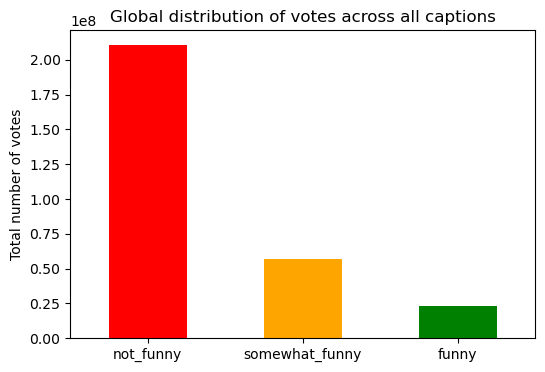

### Top 5 Captions by Mean Score

,caption,mean,precision,votes,not_funny,somewhat_funny,funny,funny_score,source_df,rank_funny_overall
452628,Mission accomplished. We will report that this...,2.998918,0.001083,924,0,1,923,38.599534,88,1.0
983727,3 ..2.. 1..,2.671296,0.034164,432,61,20,351,27.944338,178,4.0
213623,I'll never let go.,2.634196,0.019615,1468,244,49,1175,31.574538,43,3.0
862178,Lunch is on me.,2.518294,0.004085,25200,2183,7784,15232,33.593560,153,2.0
29909,Who'd have thought they'd get you for tax evas...,2.391304,0.174898,23,5,4,14,13.971382,7,438.0


### Top 5 Captions by Funny Score

,caption,mean,precision,votes,not_funny,somewhat_funny,funny,funny_score,source_df,rank_funny_overall
452628,Mission accomplished. We will report that this...,2.998918,0.001083,924,0,1,923,38.599534,88,1.0
862178,Lunch is on me.,2.518294,0.004085,25200,2183,7784,15232,33.593560,153,2.0
213623,I'll never let go.,2.634196,0.019615,1468,244,49,1175,31.574538,43,3.0
983727,3 ..2.. 1..,2.671296,0.034164,432,61,20,351,27.944338,178,4.0
1041265,Looks like you're already familiar with the si...,2.387410,0.005740,14726,1941,5211,7574,27.179467,188,5.0


### Last 5 Captions by Funny Score

,caption,mean,precision,votes,not_funny,somewhat_funny,funny,funny_score,source_df,rank_funny_overall
418104,"We're not getting Shakespeare, but about every...",1.0,0.000155,6467,6467,0,0,-10.767739,80,2292678.0
418102,"Ever so subtly, Ed began to push his right win...",1.0,0.000157,6377,6377,0,0,-10.740842,80,2292677.0
418103,I'm pretty sure I said 'hackers'.,1.0,0.000157,6366,6366,0,0,-10.737528,80,2292676.0
418101,I am concerned that this project could go sout...,1.0,0.000157,6359,6359,0,0,-10.735417,80,2292675.0
418100,They want to know if they can work remotely du...,1.0,0.000158,6313,6313,0,0,-10.721483,80,2292674.0


,caption,mean,precision,votes,not_funny,somewhat_funny,funny,funny_score,source_df,rank_funny_overall
0,I'm a congressman--obstruction is my job.,1.913043,0.094022,69,24,27,18,8.522454,0,3074.0
1,"I'm what they mean when they say, 'The middle ...",1.842105,0.191381,19,8,6,5,7.412505,0,4679.0
2,Does this suit make me look flat?,1.711111,0.112915,45,21,16,8,5.890651,0,9372.0
3,"When the right woman comes along, I'll know it.",1.625000,0.116657,32,15,14,3,4.492067,0,21567.0
4,"If you can meditate here, you can meditate any...",1.617647,0.126764,34,18,11,5,4.954970,0,16120.0


In [6]:
for i, df in enumerate(dataA):
    df['source_df'] = i  # i  allow to keep the informatio of which images the caption is related to

dataA_merged = pd.concat(dataA, ignore_index=True) # Data merging to assess all captions together


plot_global_vote_distribution(dataA_merged)

dataA_merged = compute_funny_ranking(dataA_merged)

Mean_best = dataA_merged.sort_values(["mean"],ascending=False).head(5)
display(Markdown("### Top 5 Captions by Mean Score"))
display(Mean_best)

Funny_score_best = dataA_merged.sort_values(["funny_score"],ascending=False).head(5)
display(Markdown("### Top 5 Captions by Funny Score"))
display(Funny_score_best)

Funny_score_worst = dataA_merged.sort_values(["funny_score"],ascending=True).head(5)
display(Markdown("### Last 5 Captions by Funny Score"))
display(Funny_score_worst)

dataA_merged.head()

From the top captions above, we can see that the new metric reshuffles the ranking to provide a more intuitive order. For instance, the second caption becomes "Lunch on me," which received 15,232 funny votes but had a lower mean than other captions with fewer voters. This demonstrates that the new metric better reflects the true funniness of each caption.

Similarly, for the lowest-ranked captions, our metric outperforms the mean. Using the mean, all poorly rated captions scored 1, failing to distinguish the very worst captions from the rest. With the new metric, captions with more votes carry greater weight, so the lowest-ranked captions are those that were overwhelmingly voted as not funny, as shown in the final DataFrame above.

### 4.2. Axis 1 – Professions, Politics, and Power

**Professions in Humor:**  
Which jobs are depicted most often? Which are ridiculed vs. admired? What stereotypes are recurrent (e.g., lawyers as tricksters, doctors as saviors)?  

**Politics in Humor:**  
Do captions reflect partisan leanings (Democrat vs. Republican) or mock political figures more broadly? Are political jokes rated differently? What is the temporal behaviour of political topics in captions?  

So far, the research that was conducted here takes the tokenised & lemmatised dataset, and performs a count on all occupations that occur in the [occupation list](data\final_combined_occupations.csv) created in section 1.3, and in the captions. The procedure is showed below and note that this code allows us to find multi-word occupations.

In [7]:
#loading data
dataA1, dataC1, dataA_startID, dataA_endID, dataC_lastGoodID = load_newyorker_data(filepath=STORED_DATAPREPNOUNS_PKL_PATH)

occupations_df = load_occupations(filepath=OCCUPATIONS_CSV_PATH)


FileNotFoundError: File not found: data\cleaned_data_nouns.pkl

In [ ]:
#Create dictionary mapping synonyms to occupation
occupations = occupations_df['Occupation']
synonyms_list = occupations_df['Synonyms'].tolist()
syn_to_occ = {
    synonym.lower(): occ
    for occ, synonyms in zip(occupations, synonyms_list)
    for synonym in synonyms
}

# extracting occupations in new column
extract_occupations_captions(dataA1, syn_to_occ, colname = 'occupation_counts', col_origin = 'cleaned_caption')


#counting occupations in caption
occupation_totals = count_occupation_occurrences_captions(dataA1, col='occupation_counts')

#print(f"The most common occupations found in DataA captions are:\n")
#print(occupation_totals.most_common(100))
#print("\n\n")

#plot histogram of top 20 occupations
top20 = occupation_totals.most_common(20)
occupations, counts = zip(*top20)
barchart(list(occupations), list(counts), title="Top 20 Occupations in DataA Captions", xlabel="Occupations", ylabel="Counts", color = 'mediumseagreen')


After this is done, one might say that some of the "jobs" that are found are not real professions. For example "clown" can also be seen in other ways. To remedy this in some way, the nouns can be extracted from the tokenised column. Again, the nouns were extracted using [this code](src\data\extract_nouns.py), but the obtained pickle is not in the repo. Another issue with this code is that we cannot look for occupations that are multi-worded, but the previous code showed that the most frequent mentioned are single-worded. The obtained figure is shown below.

In [ ]:
# extracting occupations in new column
extract_occupations_captions(dataA1, syn_to_occ, colname = 'occupation_counts_nouns', col_origin = 'captions_nouns')

#counting occupations in caption
occupation_totals = count_occupation_occurrences_captions(dataA1, col='occupation_counts_nouns')

#print(f"The most common occupations found in DataA captions are:\n")
#print(occupation_totals.most_common(100))
#print("\n\n")

#plot histogram of top 20 occupations
top20 = occupation_totals.most_common(20)
occupations, counts = zip(*top20)
barchart(list(occupations), list(counts), title="Top 20 Occupations in DataA Captions - only nouns", xlabel="Occupations", ylabel="Counts", color = 'navy')

We see that clown is not the funniest, though still quite high up there. To be continued...

Something to keep in mind when choosing a career path: being a doctor, lawyer or president makes you made fun of a lot.

#### 'Temporal' analysis

Here are some exploratory analyses that are good to keep in mind for the following work that will be done within this axes. 

Let check how often and in which contests do occupationss occur first. Are there any without any occupations?

In [ ]:
occupation_counts_list = occupation_counts_per_contest(dataA1, col = 'occupation_counts')

#plot
x = list(range(len(occupation_counts_list)))
y = occupation_counts_list 
plt.figure(figsize=(9, 6))
sns.barplot(x=x, y=y, color='skyblue')
plt.title("Total Occupation Counts per Contest in DataA")
plt.xlabel("Contest Index")
plt.ylabel("Total Occupation Counts")
plt.xticks(np.arange(0,len(occupation_counts_list), step = 10), rotation=45)
plt.tight_layout()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
# Are there some contests with no occupations at all?
contests_with_no_occupations = [i for i, count in enumerate(occupation_counts_list) if count == 0]

print(f"Contests with no occupations found: {contests_with_no_occupations}")

Lets check the temporal evolution of the number of job occurences in captions.

In [ ]:
# Temporal evolution of total number of job occurences in captions
sum_occupations_over_time = []
sum_ = 0
for i in range(len(dataA1)):
    sum_ += occupation_counts_list[i]
    sum_occupations_over_time.append(sum_)

x = np.arange(0, len(sum_occupations_over_time))
y = sum_occupations_over_time
scatterplot(x,y, xlabel = 'Contest Index', ylabel = 'Cumulative Job Occurrences', title = 'Temporal Evolution of Total Job Occurrences in Captions', color = 'darkorange')

We see a large jump in the number of captions near the 100th contest. This is discussed further on.

Let us look at the ratio of occupation mentions in captions to captions with no mention of occupations. 

In [ ]:
# ratio of captions with occupations to captions without occupations
caption_counts_with_occupations = []
caption_counts_without_occupations = []
for i in range(len(dataA1)):
    df = dataA1[i]
    count_with = sum(1 for counts in df['occupation_counts'] if len(counts) > 0)
    count_without = sum(1 for counts in df['occupation_counts'] if len(counts) == 0)
    caption_counts_with_occupations.append(count_with)
    caption_counts_without_occupations.append(count_without)

ratios = [with_occ / (without_occ + 1e-6) for with_occ, without_occ in zip(caption_counts_with_occupations, caption_counts_without_occupations)]
proportions = [with_occ / (with_occ + without_occ + 1e-6) for with_occ, without_occ in zip(caption_counts_with_occupations, caption_counts_without_occupations)]

#x = np.arange(len(ratios))
#scatterplot(x, ratios, xlabel = 'Contest Index', ylabel ='Ratio', title = 'Occupation Mentions Ratio in Captions', color = 'mediumseagreen')
x = np.arange(len(proportions))
scatterplot(x, proportions, xlabel = 'Contest Index', ylabel ='Proportion', title = 'Proportion of Captions with Occupation Mentions', color = 'purple')

On this graph we see that there are some contests with a high proportion of captions which contain occupations. These could correspond to contests where the image contains an actual job. This is further explored below.

Finally, let us look at how jobs occur in the description of images and the uncanny descriptions too. These are all in `dataC`, and we can compare to the evolution found in the captions in `dataA`. I will count the number of unique jobs that occur in an image description. Note that synonyms are not dealt with right now, so "policeman" and "cop" count as different jobs.


In [ ]:
#remove all NaN values
print(len(dataC1))
dataC1 = dataC1.dropna(subset='image_descriptions').reset_index(drop=True)
print(len(dataC1))

extract_occupations_captions(dataC1, syn_to_occ, colname = 'occupation_counts_image_descriptions', col_origin = 'cleaned_image_descriptions')
extract_occupations_captions(dataC1, syn_to_occ, colname = 'occupation_counts_uncanny_descriptions', col_origin = 'cleaned_image_uncanny_descriptions')

nr_occupations_image_descriptions = [len(dataC1.loc[i, 'occupation_counts_image_descriptions']) for i in range(len(dataC1))]
nr_occupations_uncanny_descriptions = [len(dataC1.loc[i, 'occupation_counts_uncanny_descriptions']) for i in range(len(dataC1))]


plt.figure(figsize=(9, 6))
plt.scatter(np.arange(len(nr_occupations_image_descriptions)), nr_occupations_image_descriptions, marker='o', color='dodgerblue', label='Image Descriptions')
plt.scatter(np.arange(len(nr_occupations_uncanny_descriptions)), nr_occupations_uncanny_descriptions, marker='o', color='crimson', label='Uncanny Descriptions')
plt.title("Total Occupation Counts in DataC Descriptions")
plt.xlabel("Contest Index")
plt.ylabel("Total Occupation Counts")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()

We can check where does at least one occupation occur, in either the uncanny description or the normal image description

In [ ]:
occupation_presence_image_descriptions = dataC1['occupation_counts_image_descriptions'].apply(has_occupation).astype(int)
occupation_presence_uncanny_descriptions = dataC1['occupation_counts_uncanny_descriptions'].apply(has_occupation).astype(int)

# Either one has occupations
either = (occupation_presence_image_descriptions | occupation_presence_uncanny_descriptions).astype(int)


scatterplot(np.arange(len(either)), either, xlabel = 'Contest Index', ylabel = 'Occupation Mentions Presence (1=Yes, 0=No)', title = 'Occupation Mentions Presence in Either Description', color = 'teal')

print(f"Number of contests with occupation mentions in either description: {either.sum()} out of {len(either)}")


So we see that we only have occupations occuring in the image (or at least its description) in $38\%$ of the captions, while we have jobs occuring in every caption contest. A future comparison would be to look at how the mentioned jobs in the metadata influence the number of occurences of jobs in captions, and if the jobs in the captions are the same as in the metadata or not. Remember to keep in mind, the metadata is much smaller than the caption dataset, so compare only relevant contests!

The three final graphs show that there is an outlier near the 100th contest, yet there are no or mentions of occupations in the metadata for this image (or maybe one in the uncanny description). It would be interesting to see what is happening here, and will be analysed later in the project.

The code above has some shortcomings, especially concerning the occupations list: it can still be enriched, the cleaning produced some entries which are not occupations, there are some trailing commas that were not removed, and one of the datasets has wording that needs to be corrected (something like "driver lorry" instead of "lorry driver").

The future studies will deal with:
- Performing an analysis about the metadata: do occupations only occur when the job is depicted in the cartoon?
- What occupations are ridiculed/admired? Are there recurring stereotypes?
 - This will focus on words co-occuring with occupations in the text.
- **Politics in Humor**
    - Here a similar database must be created like the occupations. This will be considerably shorter, as there is less clearly political text that we can identify.
    - A preliminary analysis based on a small list of political words is shown below. This will be repeated later with a more complete list of political words, and "left" and "right" will be taken out as they are not only political terms, and can lead to mis-interpretation of data.
    - Timeline of mentions of political figures / parties.  
    - Sentiment distribution around Democrats vs. Republicans.  
    - Example “political joke clusters” side by side with major events (e.g., elections).

### 4.3. Gender Roles

In [8]:
# Create the instance of our class that contains all of the functions needed for this analysis
ga = GenderAnalysis()

# remove remaining NaN in rows (if there exists any)
no_NaN, dataC0 = ga.remove_nan(dataC)

AttributeError: 'GenderAnalysis' object has no attribute 'remove_nan'

#### Basic plots

**Methodology**

- How often men/women appear in the cartoon ? 

    a. To recognize if a man/woman is in the picture, the idea is to use the *image_descriptions* and *uncanny_image_descriptions* that are contained in the metadata. **For some contest we don't have this metadata**, so for now, we will not use these ones. I defined two lists with general terms associated with each gender to detect the mention of gender in an image. It is a simple method for now, might evolve later.

    b. When this is done, I can do several plots. The first being a bar plot with just the distribution of gender over all the cartoons. Then I can plot the evolution of the gender distribution over time, to see if it is constant or not. 

- How often men/women are mentionned in the captions ?

    **Remark:** Since there are a lot of caption for each contest, to simplify this basic analysis, I'll look only in the top ten most voted captions. To do this, I find the mention of man/women in the captions with the same list ad for the catoon.

    c. Same as 0.b, do some plots of the overall contest and then evolution over the years.

- Are men more mentionned when there is a man in the picture or not, same for women ? Are men mentionned in the caption even if there are no men in the picture, same for women ? Does the humor around one gender depends on referencing the other ? 

    Added a simple “co-occurrence” heatmap → e.g., men in image × women in caption, women in image × men in caption.

In [ ]:
dataC1 = ga.get_metadata(dataC0)

count, dataTop10 = ga.get_Top10_captions(dataA, no_NaN)

In [ ]:
# How often men/women appear in a cartoon ?

# Overall distribution of gender over all the cartoons.
gender_image = dataC1['gender_mention']

# Count frequency
gender_counts = gender_image.value_counts().sort_index()

# Plot Overall counts
ga.plot_overall_counts(
    gender_counts,
    title="Gender Mentions in All Cartoons",
    xlabel="Gender Category",
    ylabel="Number of cartoons"
)

# Evolution over time
df = pd.DataFrame({"contest_index": range(0, len(dataC1)),
                   "gender_mention": dataC1['gender_mention']})

# Count mentions per contest (here each row = one contest)
counts = pd.get_dummies(df["gender_mention"]).cumsum()

# Plot cumulative counts
ga.plot_cumulative_mentions(
    counts,
    title="Cumulative Gender Mentions in Cartoons over Contests",
    xlabel="Contest index (chronological)",
    ylabel="Number of Cartoons",
    legend_title="Gender"
)


In [ ]:
# How often men/women are mentionned in the top 10 captions

overall_counts, pivoted = ga.distribution_captions(count)

# In the plots I don't show the neutral, because it is a huge number compared
# to the other categories

# Plot Overall counts
ga.plot_overall_counts(
    overall_counts,
    title="Overall Presence of Gender Mentions in the top 10 Captions",
    xlabel="Gender Category",
    ylabel="Number of Captions",
    neutral = False
)

# Evolution over time
cumulative = pivoted.cumsum()

# Plot cumulative counts
ga.plot_cumulative_mentions(
    cumulative,
    title="Cumulative Gender Mentions in Top 10 Captions per Contest",
    xlabel="Contest index (chronological)",
    ylabel="Number of Captions",
    legend_title="Gender",
    neutral = False
)

Let's look at cross-relationships between gender in the image and gender in the caption. Here we'll look at this relationship for the top voted caption.

In [ ]:
cross = ga.compute_crosstab(no_NaN, dataA, dataC1)

ga.plot_gender_cooccurrence(cross, title = "Gender Co-occurrence: Image vs Caption", 
                            xlabel="Caption Gender",
                            ylabel="Image Gender")

With these initial plots, it is clear that we can reliably detect the genders associated with both cartoons and captions.

We observe that men are mentioned about five times more frequently than women as the sole gender. 

Looking at the gender distribution across all selected captions, most are gender-neutral, while the next most frequent mentions are of men—consistent with the fact that many cartoons primarily depict male characters.

#### How are men vs women depicted ?

For this, we followed the methodology of Neal Caren in this site: https://nealcaren.github.io/text-as-data/html/times_gender.html. He studied how the Times writes about men and women.

Here is the methodology: 

- Split text into units: Divide the text into sentences or other meaningful segments for analysis.

- Define gender indicators: Create lists of words or phrases that signal the presence of each category

- Label each unit: Assign a label to each sentence based on which category indicators it contains (e.g., “male,” “female,” “both,” or "neutral").

- Tokenize and clean text: Break sentences into words, removing proper nouns, stop words, and the indicator words themselves.

- Count word frequencies by category: Compute how often each word appears in sentences labeled with each category.

- Normalize frequencies: Adjust word counts by the total number of words in each category to make comparisons fair.

    $ S_{w}^{\text{male}} = \dfrac{\tfrac{c_{w,m}}{N_m}}{\tfrac{c_{w,m}}{N_m} + \tfrac{c_{w,f}}{N_f}} $

    Where:  
        - $ S_{w}^{\text{male}} $ — normalized "male share" score for word w ; the proportion of the word's usage associated with male-subject sentences.  
        - $ c_{w,m} $ — count of occurrences of word w in male-subject sentences.  
        - $ c_{w,f} $ — count of occurrences of word w in female-subject sentences.  
        - $ N_m $ — total number of words (tokens) across all male-subject sentences.  
        - $ N_f $ — total number of words (tokens) across all female-subject sentences.  


- Identify associations: Find words that are disproportionately frequent in one category compared to others.

- Visualize results: Display the strongest associations, with word clouds, to show which words are most linked to each category.

In [ ]:
# loading results based on this analysis

# wordcloud on the words that were most associate with man or woman

with open(r"src\data\gender_roles_data\male_freq.json") as f:
    male_freq = json.load(f)

# --- Generate the word clouds ---
male_cloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    colormap='Blues',
    max_words=200,
    stopwords=ga.STOPWORDS
).generate_from_frequencies(male_freq)

with open(r"src\data\gender_roles_data\female_freq.json") as g:
    female_freq = json.load(g)

female_cloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    colormap='Reds',
    max_words=200,
    stopwords=ga.STOPWORDS
).generate_from_frequencies(female_freq)

# # --- Display both word clouds side by side ---
ga.plot_wordclouds(male_cloud, female_cloud)

The purpose of this word cloud is to highlight the words most frequently associated with each gender in the cartoons and captions. 

By examining these associations, we can begin to understand the roles and traits attributed to men and women within this specific cultural context. 

If someone’s only exposure to gender roles in society came from these cartoon descriptions, the word cloud gives a sense of what impressions they might form about men and women. 

Additionally, this visualization provides an initial lens to explore whether common stereotypes are present, and if so, how they are reinforced or challenged within the contest.

# A big (thank you)² for this lecture !

# What is the answer to ADA, the universe and everything ?

In [ ]:
import random

answer = None
number_of_tries = 0
while answer != 42:
    # Generate one random number
    answer = random.randint(0, 1_000_000)
    number_of_tries += 1

print("Number of TEEEEEENTATIVES:", number_of_tries, end="\r")
print("\nThe answer to ADA, the universe and everything is:", answer)


# <center>Humor as a Mirror: The New Yorker Captions as Reflections of Society, Politics, and Stereotypes</center>
# <center>THE END</center>

<br/><br/>
<center>
    <img src="data/newyorker_caption_contest_virgin/images/606.jpg" alt="New Yorker Cartoon" style="width:300px; height:auto; border-radius:5px; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
</center>